# Dado Cargado

Daniel parece estar ganando muchas partidas. Al ser *Data Scientist junior*  tienes muchas *sospechosas* de sus amados dados 

<div align="center">
    <img width="250" height="250" src="https://photos.demandstudios.com/getty/article/244/134/200325635-001.jpg" alt="dados">
</div>
 
Así que has estado registrando el resultado de cada lanzamiento, y están en `loaded_500.txt`.

Hay que responder la pregunta más simple que surge: ¿*Daniel* está sacando demasiados seises?

Respondamos la pregunta con rigor.

1. Visualiza los datos. Asegúrate de que lo entendamos.
2. Reducir o cuantificar los datos
3. Plantear nuestra hipótesis (y visualizar)
4. Calcular

In [1]:
import pandas as pd
import scipy.stats as ss
import numpy as np
import matplotlib.pyplot as plt
import math


data = np.loadtxt("loaded_500.txt")

### Visualización

[1. 2. 3. 4. 5. 6.] [70 84 86 74 88 98]


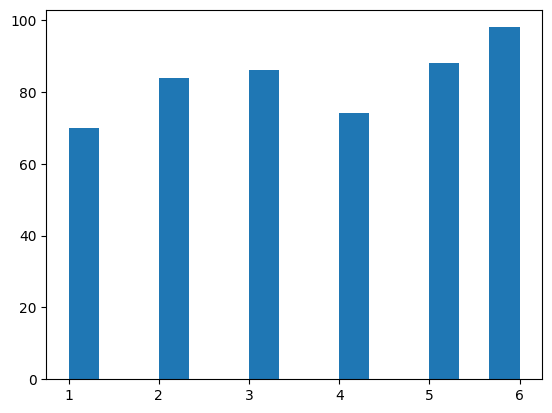

In [6]:
unique, counts = np.unique(data, return_counts=True) # return_counts: devuelve la cuenta de apariciones 
print(unique, counts)
plt.hist(data, bins=15);

### Reducir o cuantificar datos

In [40]:
num_seis = (data == 6).sum() #cuantos valores han salido 6
num_total = data.size # total de la muestra

### Plantear nuestra Hipótesis

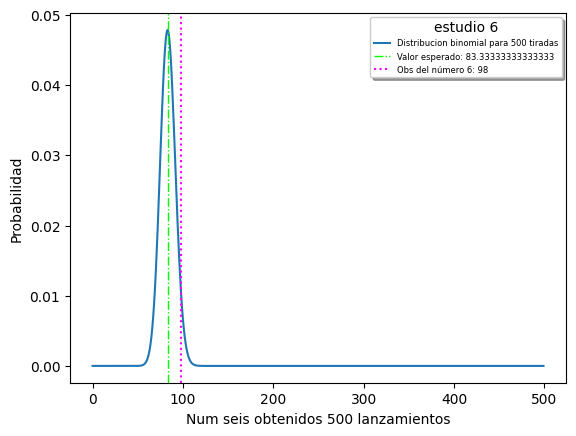

In [104]:
from scipy.stats import binom
n = np.arange(num_total)
prob_n = binom.pmf(n, num_total, 1/6) 

# n: array de 0 a 499 (va a ser el eje x)
# num_total: muestra (500 tiradas (tamaño del archivo))
# 1/6, probabilidad de acierto

plt.plot(n, prob_n, label="Distribucion binomial para {} tiradas".format(num_total))

plt.axvline(num_total/6, ls="dashdot", color='#00FF00',lw=1, label="Valor esperado: "+str(num_total/6))
# linea vertical verde (valores esperados, total * probabilidad -> 500*1/6)


plt.axvline(num_seis, ls=":", color="#ff00ff", label="Obs del número 6: "+str(num_seis)) 
# linea vertical rosa (valores observados =6)

plt.xlabel(f"Num seis obtenidos {num_total} lanzamientos")
plt.ylabel("Probabilidad")
plt.legend(shadow=True, title='estudio 6', fontsize=6);

El 3.7% de las veces con un dado justo se obtendrían tantos seis o más


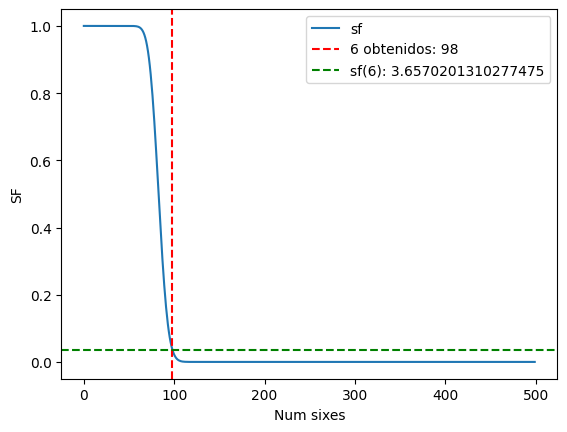

In [105]:
d = binom(num_total, 1/6) #n=num_total, p=1/6

plt.plot(n, d.sf(n), label='sf')
#plt.plot(n, d.cdf(n), label='cdf')

plt.axvline(num_seis, ls="--", color='red', label='6 obtenidos: '+str(num_seis))
# vertical, número de veces que ha salido 6

#sf = d.sf(num_seis)
sf = d.sf(num_seis)
# que probabilidad hay de sacar num_seis (98) seises o más en 500 tiradas

#cdf=d.cdf(num_seis)

plt.axhline(sf, ls="--", color='green', label='sf(6): '+str(sf*100))
#plt.axhline(cdf, ls="-.", color='magenta', label='cdf(6)')

plt.xlabel("Num sixes")
plt.ylabel("SF");

plt.legend()

print(f"El {sf * 100:.1f}% de las veces con un dado justo se obtendrían tantos seis o más")

In [173]:
# EJERCICIO CLASE

In [200]:
np.random.seed(1234)

In [201]:
poblacion1=ss.poisson.rvs(loc=18,mu=35,size=450000)
poblacion2=ss.poisson.rvs(loc=18,mu=15,size=150000)

In [202]:
España=np.concatenate((poblacion1,poblacion2))

In [203]:
granada1=ss.poisson.rvs(loc=18,mu=34,size=4500)
granada2=ss.poisson.rvs(loc=18,mu=16,size=1500)
Granada=np.concatenate((granada1,granada2))

In [205]:
granada1

array([58, 53, 53, ..., 44, 55, 41], dtype=int64)

In [206]:
granada2

array([37, 35, 37, ..., 33, 38, 38], dtype=int64)

In [207]:
#ver si estadistiamente la media de granada
# es la misma que la media de españa

In [208]:
print(España.mean())
print(Granada.mean())

47.985978333333335
47.470166666666664


In [209]:
# test hipotesis

# hipotesis 1
# mu españa = mu granada

# alternativa mu españa != mu granada1


In [210]:
ss.ttest_1samp(Granada,España.mean())

# devuelve p valor y estadístico
# el p valor es lo importante
# p valor, como de grande debe ser para que el valor este dentro del
# intervalo de confianza

# pvalue=2.4797436373616708e-05
# al ser menor que alfa = 0,05, se desecha
# por defecto alfa es 0.05, si no nos dan otro

# Granada no tiene la misma media que España

TtestResult(statistic=-4.219937801559567, pvalue=2.4797436373616708e-05, df=5999)

In [211]:
estadistico,pvalor=ss.ttest_1samp(Granada,España.mean())
# compara toda la muestra de granada, con la media de España

In [212]:
if pvalor<0.05: print('Hipótesis rechazada')
else: print('aceptado')

Hipótesis rechazada


In [213]:
madrid1=ss.poisson.rvs(loc=18,mu=37,size=120)
madrid2=ss.poisson.rvs(loc=18,mu=13,size=80)
Madrid=np.concatenate((madrid1,madrid2))

In [214]:
Madrid.mean()

44.895

In [215]:
# madrid y Granada tienen la misma edad poblacional?
# t-test independiente, se le pasan los dos arrays

ss.ttest_ind(Granada, Madrid, equal_var=False)

# equal_var, indicamos si la varianza es igual o no
# primero compara si las varianzas son iguales. si son iguales aplica una formula
# y si es diferente aplica otra

# pvalue < 0.05, estadísticamente se rechaza la hipótesis. No son iguales

Ttest_indResult(statistic=2.904158181180957, pvalue=0.0040824563102907305)

In [216]:
# test pareado
# 
#

peso_precovid=ss.norm.rvs(scale=30, loc=100, size=1000)
peso_postcovid=peso_precovid+ss.norm.rvs(scale=30, loc=1.25, size=1000)

In [217]:
pesos=pd.DataFrame({'peso_precovid':peso_precovid,
              'peso_postcovid':peso_postcovid,
              'Diferencia':peso_postcovid-peso_precovid})

In [218]:
pesos.describe().T

,count,mean,std,min,25%,50%,75%,max
peso_precovid,1000.0,100.493785,28.765533,13.866641,80.701193,100.090699,120.395016,184.742129
peso_postcovid,1000.0,100.542412,42.634115,-24.878585,71.785546,101.565112,129.671355,224.004835
Diferencia,1000.0,0.048627,30.341340,-96.431144,-20.624487,0.483189,21.052240,92.209482


In [219]:
ss.ttest_rel(peso_precovid,peso_postcovid)

#ttest relacionado, el peso pre y post estan relacionados. Misma muestra, diferentes momentos

# por defecto calcula si son iguales o no

# nos dice que son iguales al ser pvalue > 0.05

TtestResult(statistic=-0.05068032173835758, pvalue=0.9595903885533001, df=999)

In [220]:
ss.ttest_rel(peso_precovid,peso_postcovid, alternative='two-sided')

# two sided hipotesis nula pre = post.
# es lo mismo que no poner alternative

TtestResult(statistic=-0.05068032173835758, pvalue=0.9595903885533001, df=999)

In [222]:
# En caso de que se rechaze la hipotesis nula, y no sean iguales,
# para saber si ha subido o bajado vemos las alternativas

# REVISAR HIPOTESIS NULA Y ALTERNATIVA
 
# alternative: 'less': hipotesis nula pre >= post y alternativa pre < post

# alternative='greater'. hipotesis nula,pre <= post, y alternativa pre > post


ss.ttest_rel(peso_precovid,peso_postcovid, alternative="greater")

# pvalue>0.05, NO SE ACEPTA LA NULA, Y ACEPTAMOS LA ALTERNATIVA(pre>post)

TtestResult(statistic=-0.05068032173835758, pvalue=0.5202048057233499, df=999)

### ANOVA

In [235]:
Peliculas=['IJ', 'Bat', 'Marvel', 'Seño_Anillos', 'Tenet']
# preguntar a 1000 personas: pelicula vista

pelicula_vista=np.random.choice(a=Peliculas
                                ,p=[0.1,0.2,0.2,0.15,0.35]
                                ,size=1000)
voto_Edad=ss.poisson.rvs(loc=9, mu=25,size=1000)

In [236]:
df=pd.DataFrame({'Pelicula':pelicula_vista, 'Edad':voto_Edad})

In [237]:
grupos=df.groupby('Pelicula').groups
print(grupos.keys()) # claves, nombre de los valores agrupados
grupos.values() # valores

# te dice diccionario con los índices en el que está cada película

dict_keys(['Bat', 'IJ', 'Marvel', 'Seño_Anillos', 'Tenet'])


dict_values([Index([  0,   4,   5,   9,  17,  21,  27,  35,  40,  50,
       ...
       943, 948, 952, 957, 960, 966, 975, 994, 997, 999],
      dtype='int64', length=200), Index([  8,  11,  26,  29,  38,  39,  45,  52,  62,  66,  68,  78,  94, 113,
       115, 123, 125, 127, 139, 156, 186, 189, 214, 235, 258, 269, 273, 291,
       293, 306, 311, 316, 318, 325, 326, 349, 358, 407, 422, 445, 459, 475,
       479, 489, 514, 530, 549, 552, 600, 610, 618, 623, 634, 683, 717, 718,
       719, 727, 745, 749, 751, 759, 776, 778, 785, 789, 798, 800, 822, 826,
       834, 835, 853, 877, 891, 899, 906, 914, 950, 964, 968, 970, 987, 993,
       996],
      dtype='int64'), Index([  1,   3,   7,  19,  20,  30,  31,  33,  43,  46,
       ...
       956, 959, 963, 965, 971, 972, 980, 981, 986, 990],
      dtype='int64', length=187), Index([ 13,  14,  28,  48,  55,  56,  60,  64,  84,  89,
       ...
       931, 934, 944, 958, 962, 969, 977, 978, 985, 992],
      dtype='int64', length=161), Index([  2

In [238]:
Bat=voto_Edad[grupos['Bat']] # recibe los indices de los que han visto Batman
IJ=voto_Edad[grupos['IJ']]
Marvel=voto_Edad[grupos['Marvel']]
Señor_Anillos=voto_Edad[grupos['Seño_Anillos']]
Tenet=voto_Edad[grupos['Tenet']]

# saca del array general de edades, usando los indices de la agrupacion de oeliculas (grupos),
# la edad de todos los que han visto cada película

In [240]:
ss.f_oneway(Bat,IJ,Marvel,Señor_Anillos,Tenet)

# hipótesis de que la media de todos es igual
# hipotesis alternativa, la media de alguno de ellos es diferente

# pvalue >0.05, SE ACEPTA la hipótesis nula, son iguales las medias de edad

F_onewayResult(statistic=0.18589820832461834, pvalue=0.9457861034630087)

In [241]:
# SI SALE pvalor <0.05, se rechaza
# podemos buscar cual/es difiere/n

import statsmodels.api as sm
from statsmodels.formula.api import ols

In [242]:
modelo=ols('Edad~Pelicula', data=df).fit()
# .fit ajusta Edad y Pelicula

In [245]:

sm.stats.anova_lm(modelo,typ=2)

# otra manera de sacar el mismo resultado que 
# ss.f_oneway(Bat,IJ,Marvel,Señor_Anillos,Tenet)

,sum_sq,df,F,PR(>F)
Pelicula,18.464371,4.0,0.185898,0.945786
Residual,24707.135629,995.0,NaN,NaN


In [246]:
# COMO HEMOS ACEPTADO LA MEDIA DE EDAD, 
# vamos a cambiar la edad de espectadores de IJ, para saber que esa es diferente y 
# poder ver cómo se calculan las que difieren


In [229]:
IJ_Edad=ss.poisson.rvs(loc=18, mu=35, size=1000)

In [233]:
# pelicula_vista=='IJ'
# array de true y false, según la pelicula sea IJ o no

In [247]:
# se pasan tres arrays, uno con las condiciones true o false
# otro con los valores modificados de edad de IJ
# tercer, el valor inicial de edades

# Donde el array es True coge el valor de IJ_Edad
# y el resto de valores se queda igual (voto_Edad)

voto_Edad2=np.where(pelicula_vista=='IJ', IJ_Edad, voto_Edad)

In [248]:
df1=pd.DataFrame({'Pelicula':pelicula_vista, 'Edad':voto_Edad2})

In [249]:
modelo=ols('Edad~Pelicula', data=df1).fit()

In [250]:
sm.stats.anova_lm(modelo,typ=2)

#alguno es diferente

,sum_sq,df,F,PR(>F)
Pelicula,27453.698665,4.0,278.007183,2.050309e-160
Residual,24564.500335,995.0,NaN,NaN


* ver cual difiere

### solucion


* hacer parejas
    * sin repeticion (bat,IJ) (IJ-bat) o misma   (bat-bat)
    
* test independiente, no estan relacionadas las variables

* pvalor>0.05 no se acepta
* si pvalor < 0.05>

### especificaciones

* lista vacia para guardar parejas

In [276]:
lista_pares_rechazados=[] # para guardar las parejas de peliculas que no sean iguales en media

# recorrer el array de peliculas para no repetir elmtos comparadod

for i in range(len(Peliculas)-1):
    for j in range(i+1,len(Peliculas)):
        # si el ttest < 0.05 se rechaza
        statistic,pvalue=ss.ttest_ind(voto_Edad2[grupos[Peliculas[i]]],voto_Edad2[grupos[Peliculas[j]]], equal_var=False) 
        
        if pvalue<0.05:
            lista_pares_rechazados.append((Peliculas[i],Peliculas[j]))

In [279]:
for p1,p2 in lista_pares_rechazados:
    print(p1,p2)

IJ Bat
IJ Marvel
IJ Seño_Anillos
IJ Tenet


In [283]:
# multicomparacion++f


from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey=pairwise_tukeyhsd(voto_Edad2,pelicula_vista, alpha=0.05)
tukey

In [287]:
# para descifrar ese modelo
tukey.summary()

# todos los reject=True rechazamos hipotesis nula 

# meandif, valor que toma como media, y da intervalos de confianza, lower y upper 


group1,group2,meandiff,p-adj,lower,upper,reject
Bat,IJ,18.6082,0.0,16.8501,20.3663,True
Bat,Marvel,-0.242,0.9893,-1.6233,1.1392,False
Bat,Seño_Anillos,-0.0856,0.9998,-1.5233,1.3521,False
Bat,Tenet,-0.277,0.9695,-1.4704,0.9164,False
IJ,Marvel,-18.8503,0.0,-20.6265,-17.074,True
IJ,Seño_Anillos,-18.6938,0.0,-20.5143,-16.8733,True
IJ,Tenet,-18.8852,0.0,-20.5197,-17.2508,True
Marvel,Seño_Anillos,0.1564,0.9984,-1.3034,1.6163,False
Marvel,Tenet,-0.035,1.0,-1.2549,1.185,False
Seño_Anillos,Tenet,-0.1914,0.9942,-1.475,1.0922,False


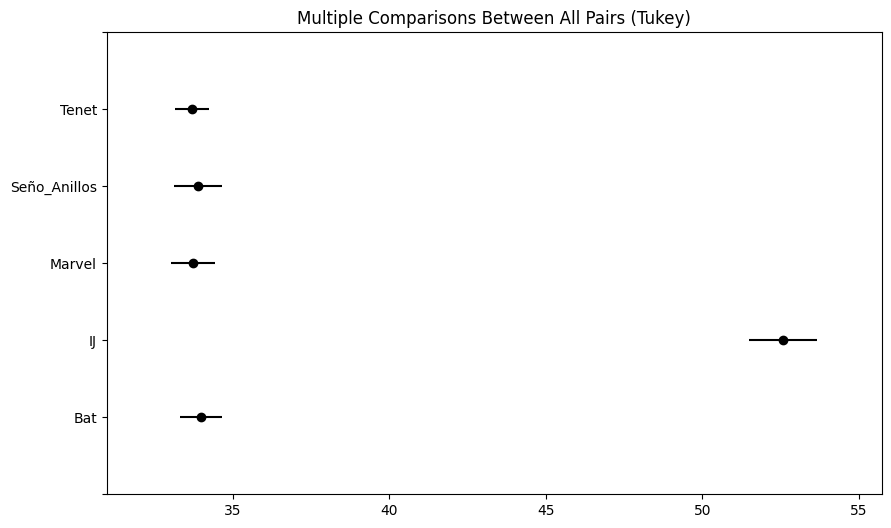

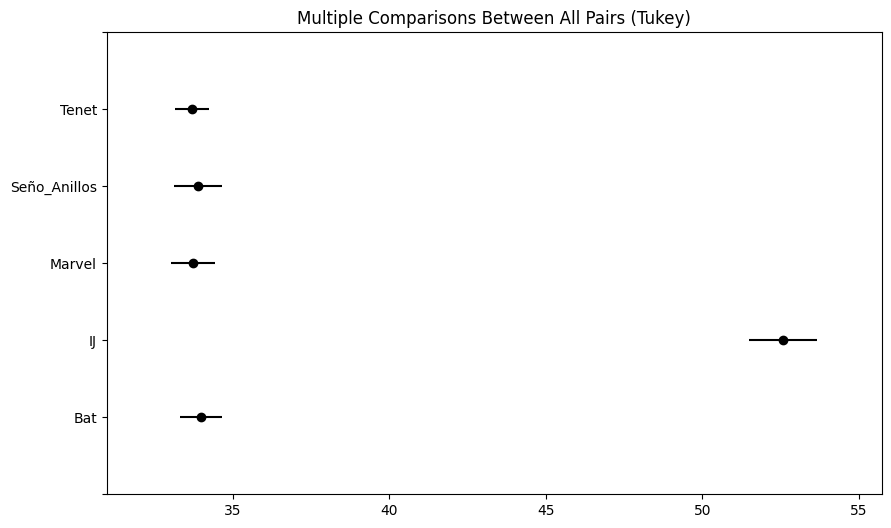

In [289]:
tukey.plot_simultaneous()

In [293]:
tukey2=pairwise_tukeyhsd(voto_Edad2,pelicula_vista, alpha=0.99)
tukey2.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Bat,IJ,18.6082,0.0,18.3058,18.9106,True
Bat,Marvel,-0.242,0.9893,-0.4796,-0.0045,True
Bat,Seño_Anillos,-0.0856,0.9998,-0.3329,0.1617,False
Bat,Tenet,-0.277,0.9695,-0.4823,-0.0717,True
IJ,Marvel,-18.8503,0.0,-19.1558,-18.5448,True
IJ,Seño_Anillos,-18.6938,0.0,-19.007,-18.3807,True
IJ,Tenet,-18.8852,0.0,-19.1664,-18.6041,True
Marvel,Seño_Anillos,0.1564,0.9984,-0.0946,0.4075,False
Marvel,Tenet,-0.035,1.0,-0.2448,0.1749,False
Seño_Anillos,Tenet,-0.1914,0.9942,-0.4122,0.0294,False


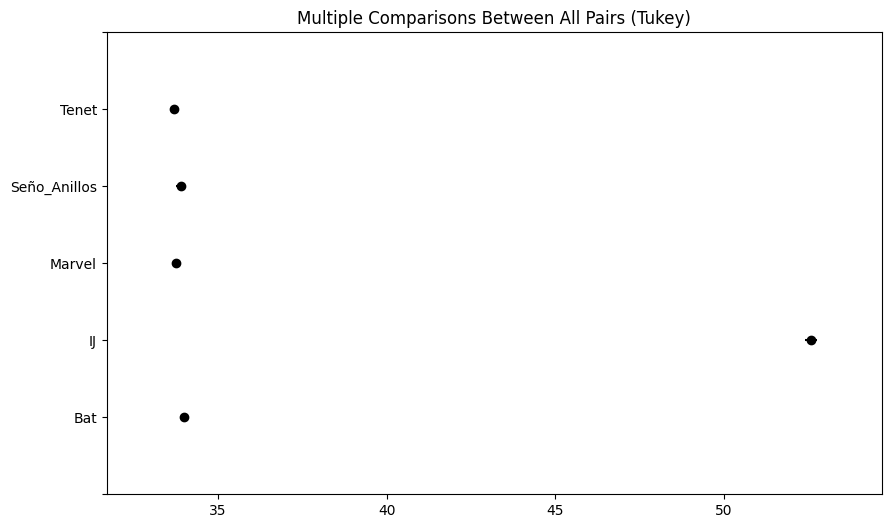

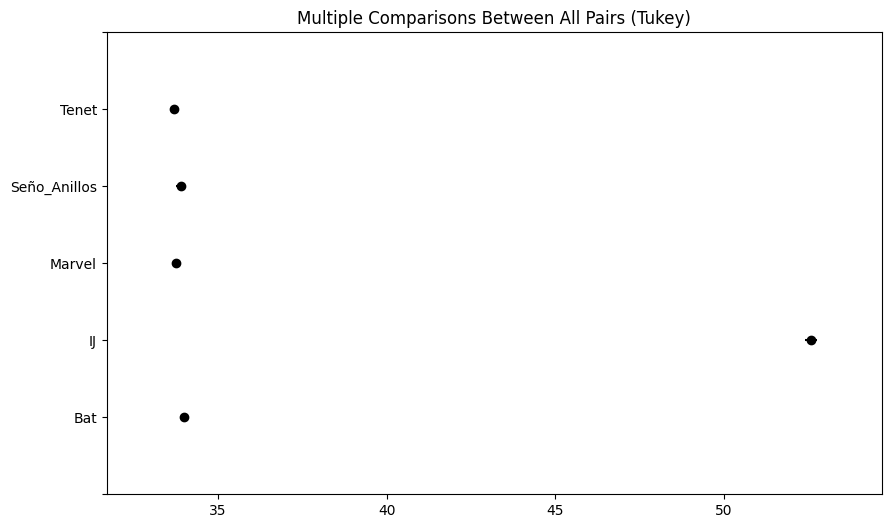

In [295]:
tukey2.plot_simultaneous()